# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [8]:
# here is a Python list:
a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a
a_last_3 = a[3:7]
print(a_last_3)

# reverse the list
a_reverse = list(reversed(a))
print(a_reverse)

# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
a_sq = [i**2 for i in a]
print(a_sq)

[4, 5, 6]
[6, 5, 4, 3, 2, 1]
[1, 4, 9, 16, 25, 36]


In [14]:
# create a numpy array from this list
b = np.array(a)
type(b)

numpy.ndarray

In [17]:
# find the mean of b
b.mean()

3.5

In [18]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
list(b**2)

[1, 4, 9, 16, 25, 36]

In [22]:
# change b from a length-6 list to a 2x3 matrix
b = np.reshape(b, (2,3))
print(b)

[[1 2 3]
 [4 5 6]]


In [24]:
# find the mean value of each row
np.mean(b, axis = 1)

array([2., 5.])

In [25]:
# find the mean value of each column
np.mean(b, axis = 0)

array([2.5, 3.5, 4.5])

In [30]:
# find the third column of b
b[:,2]

array([3, 6])

In [50]:
# load in the "starbucks_clean.csv" dataset
sbux = pd.read_csv('/Users/jameskim/Desktop/Education/Undergrad/WN21/MDST/mdst_tutorials/data/starbucks_clean.csv')
sbux.head()

,Unnamed: 0,beverage_category,beverage,beverage_prep,calories,total fat,trans fat,saturated fat,sodium,total carbohydrates,cholesterol,dietary fibre,sugars,protein,vitamin a,vitamin c,calcium,iron,caffeine
0,0,coffee,brewedcoffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0.0,175
1,1,coffee,brewedcoffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0.0,260
2,2,coffee,brewedcoffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0.0,330
3,3,coffee,brewedcoffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0.0,410
4,4,classicespressodrinks,cafflatte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0.0,75


In [34]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
sbux['calories'].mean()

193.87190082644628

In [42]:
# how many different categories of beverages are there?
len(sbux.beverage_category.unique())

9

In [46]:
# what is the average # calories for each beverage category?
sbux.groupby('beverage_category')['calories'].mean()

beverage_category
classicespressodrinks            140.172414
coffee                             4.250000
frappuccinoblendedcoffee         276.944444
frappuccinoblendedcrme           233.076923
frappuccinolightblendedcoffee    162.500000
shakenicedbeverages              114.444444
signatureespressodrinks          250.000000
smoothies                        282.222222
tazoteadrinks                    177.307692
Name: calories, dtype: float64

In [53]:
# what beverage preparation includes the most sugar on average?
sbux.groupby('beverage_prep')['sugars'].mean().sort_values(ascending = False)

beverage_prep
Whole Milk            55.687500
Venti Nonfat Milk     50.045455
Grande Nonfat Milk    38.615385
Soymilk               31.848485
2% Milk               30.980000
Tall Nonfat Milk      28.521739
Venti                 27.714286
Grande                20.000000
Short Nonfat Milk     17.000000
Tall                  14.714286
Short                  8.250000
Solo                   0.000000
Doppio                 0.000000
Name: sugars, dtype: float64

In [56]:
# what is the average % daily value calcium content for each beverage?
sbux.groupby('beverage')['calcium'].mean().sort_values(ascending = False)

beverage
whitechocolatemochawithoutwhippedcream       41.250000
tazogreentealatte                            39.166667
cafflatte                                    35.000000
hotchocolatewithoutwhippedcream              35.000000
skinnylatteanyflavour                        33.750000
vanillalatteorotherflavouredlatte            32.916667
caffmochawithoutwhippedcream                 30.000000
caramelmacchiato                             28.333333
cappuccino                                   22.500000
tazochaitealatte                             21.666667
tazofullleaftealatte                         20.833333
tazofullleafredtealattevanillarooibos        20.833333
bananachocolatesmoothie                      20.000000
strawberriescrmewithoutwhippedcream          15.000000
javachipwithoutwhippedcream                  12.555556
coffee                                       12.333333
mochawithoutwhippedcream                     12.000000
caramelwithoutwhippedcream                   12.000000
j

In [74]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay

sbux['gains'] = sbux['protein'] - sbux['calories']
sbux[['beverage', 'gains']].loc[sbux['gains'] == max(sbux['gains'])]

# tazotea :O

,beverage,gains
102,tazotea,0.0
103,tazotea,0.0
104,tazotea,0.0
105,tazotea,0.0


<AxesSubplot:ylabel='Frequency'>

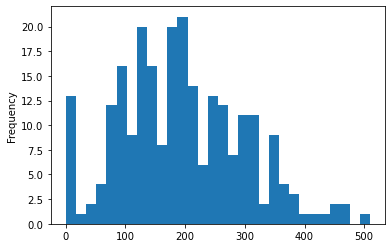

In [83]:
# plot the distribution of the number of calories in drinks using matplotlib
sbux['calories'].plot.hist(bins = 30 )

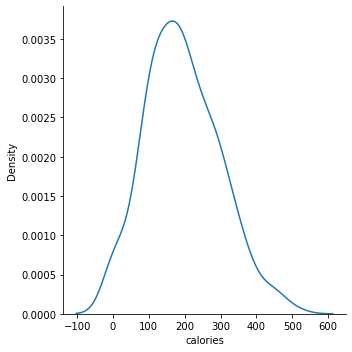

In [91]:
# plot the same distribution using seaborn. what about a density plot instead?
sns.displot(data = sbux, x = 'calories', kind = 'kde')

<AxesSubplot:xlabel='calories', ylabel='total fat'>

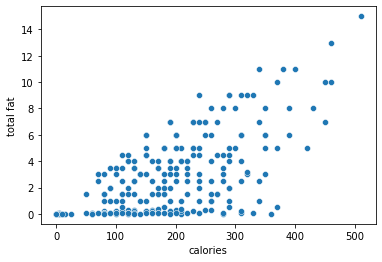

In [92]:
# plot calories against total fat using seaborn
sns.scatterplot(data = sbux, x = 'calories', y = 'total fat')

['Short' 'Tall' 'Grande' 'Venti' '0']


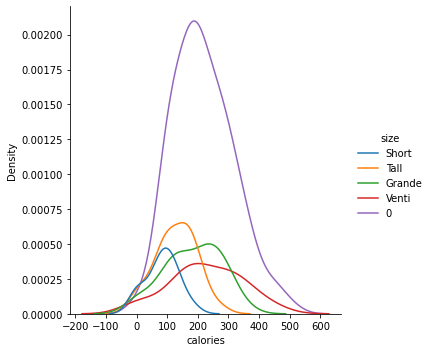

In [117]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.
# ---------------------------------

# Create string match conditions
conditions = [
    sbux['beverage_prep'].str.contains('Short'),
    sbux['beverage_prep'].str.contains('Tall'),
    sbux['beverage_prep'].str.contains('Grande'),
    sbux['beverage_prep'].str.contains('Venti')
    ]

# Create corresponding choices
choices = ['Short', 'Tall', 'Grande', 'Venti']

# Apply conditions and choices, save to new list 'size'
sbux['size'] = np.select(conditions, choices)
# Verify results
print(sbux['size'].unique())   # Non-matches default to 0

# Plot 
sns.displot(data = sbux, x = 'calories', kind = 'kde', hue = 'size')